# Prac 07.1


In [1]:
import os
import cv2
import numpy as np

from time import time

from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [3]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as z:
    z.extractall()

### Step 1
Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?

In [4]:
folder = 'data/subset_homework'

class0_dir = os.path.join(folder, 'class_id_0')
class1_dir = os.path.join(folder, 'class_id_1')

fnames_0 = sorted(os.listdir(class0_dir))
fnames_1 = sorted(os.listdir(class1_dir))

images_0 = [cv2.imread(os.path.join(class0_dir, f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
images_1 = [cv2.imread(os.path.join(class1_dir, f), cv2.IMREAD_UNCHANGED) for f in fnames_1]

labels_0 = [0] * len(images_0)
labels_1 = [1] * len(images_1)

print('Num samples class_0:', len(images_0))
print('Num samples class_1:', len(images_1))
print('Total samples:', len(images_0) + len(images_1))

Num samples class_0: 2220
Num samples class_1: 2250
Total samples: 4470


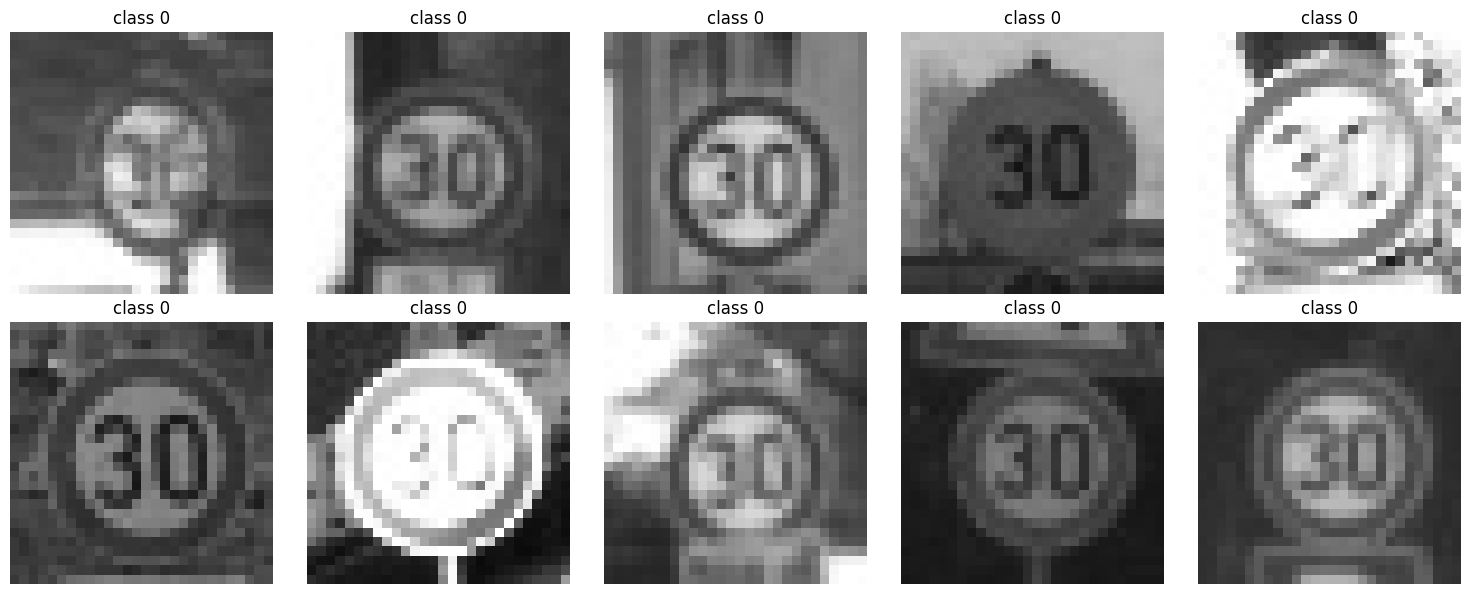

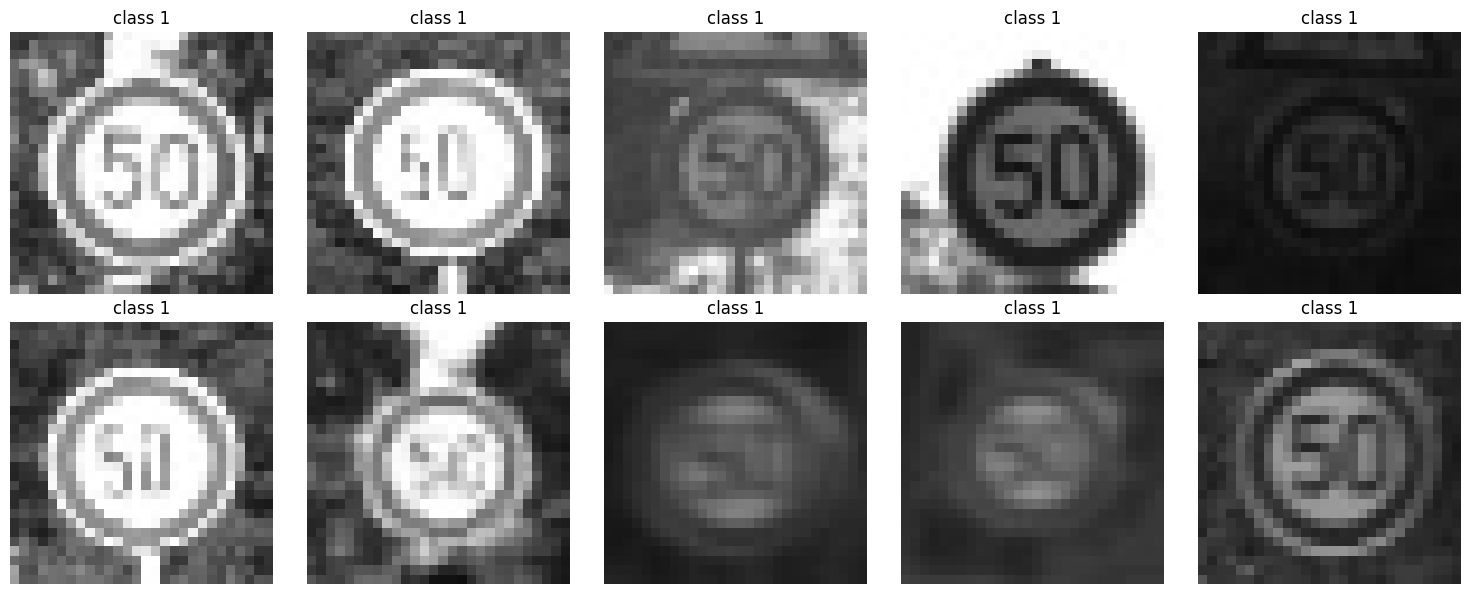

In [5]:
n_show = 10

plt.figure(figsize=(15, 6))
# class 0
for cnt, idx in enumerate(np.random.randint(0, len(images_0), n_show)):
    plt.subplot(2, n_show//2, cnt + 1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('class 0')
    plt.axis(False)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
# class 1
for cnt, idx in enumerate(np.random.randint(0, len(images_1), n_show)):
    plt.subplot(2, n_show//2, cnt + 1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('class 1')
    plt.axis(False)

plt.tight_layout()
plt.show()

In [6]:
images = images_0 + images_1
labels = labels_0 + labels_1

images, labels = shuffle(images, labels, random_state=42)

images = np.array(images)
labels = np.array(labels)

print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

start = time()
pixels = np.array([img.flatten() for img in images]) / 255.0
stop = time()

print('Pixels shape:', pixels.shape)
print('Flatten elapsed time:', stop - start)

Images shape: (4470, 28, 28)
Labels shape: (4470,)
Pixels shape: (4470, 784)
Flatten elapsed time: 0.02189922332763672


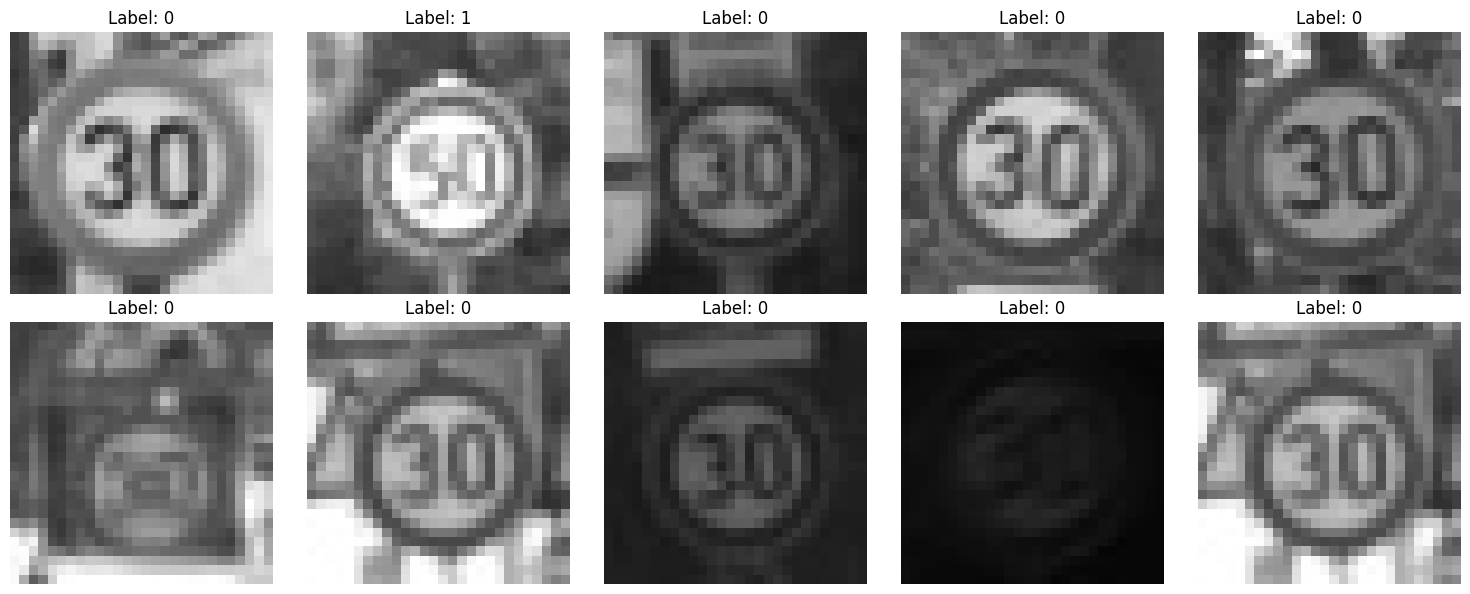

In [7]:
plt.figure(figsize=(15, 6))
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {labels[idx]}')
    plt.axis(False)

plt.tight_layout()
plt.show()


### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

In [8]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model_baseline = Model(inputs, outputs)

model_baseline.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4053
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2475
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2047
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1700
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1469
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1349
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1193
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1118
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1100
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1033


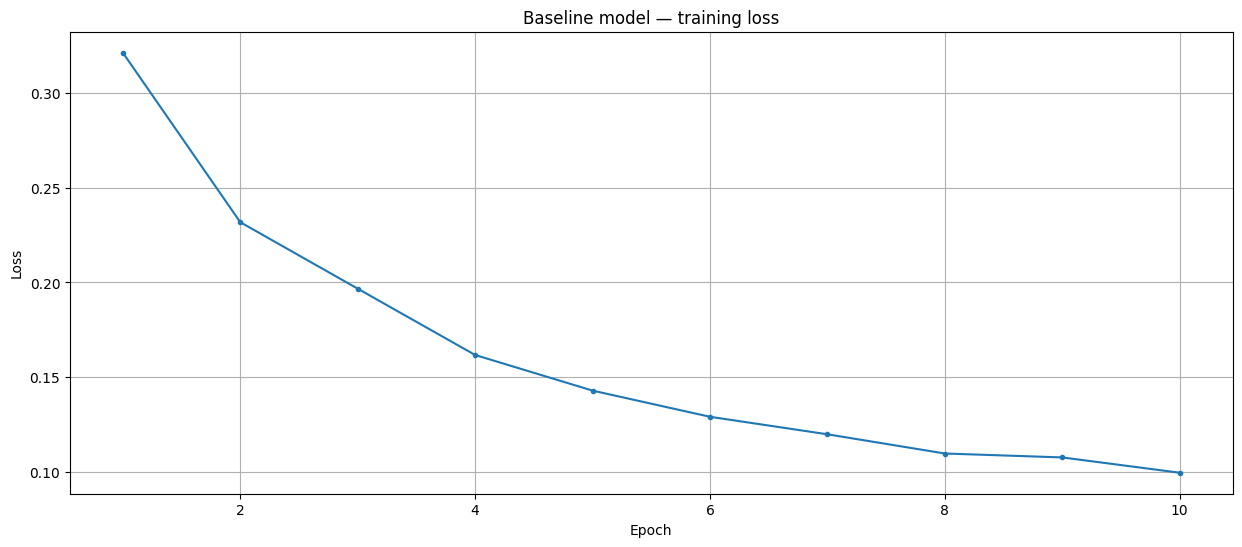

In [9]:
model_baseline.compile(optimizer='adam', loss='mean_squared_error')

history_baseline = model_baseline.fit(
    pixels, labels,
    epochs=10,
    batch_size=32,
    verbose=1
)

h = history_baseline.history
epochs = range(1, len(h['loss']) + 1)

plt.figure()
plt.plot(epochs, h['loss'], '.-')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Baseline model — training loss')
plt.show()

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Baseline accuracy (one neuron, linear): 0.8868


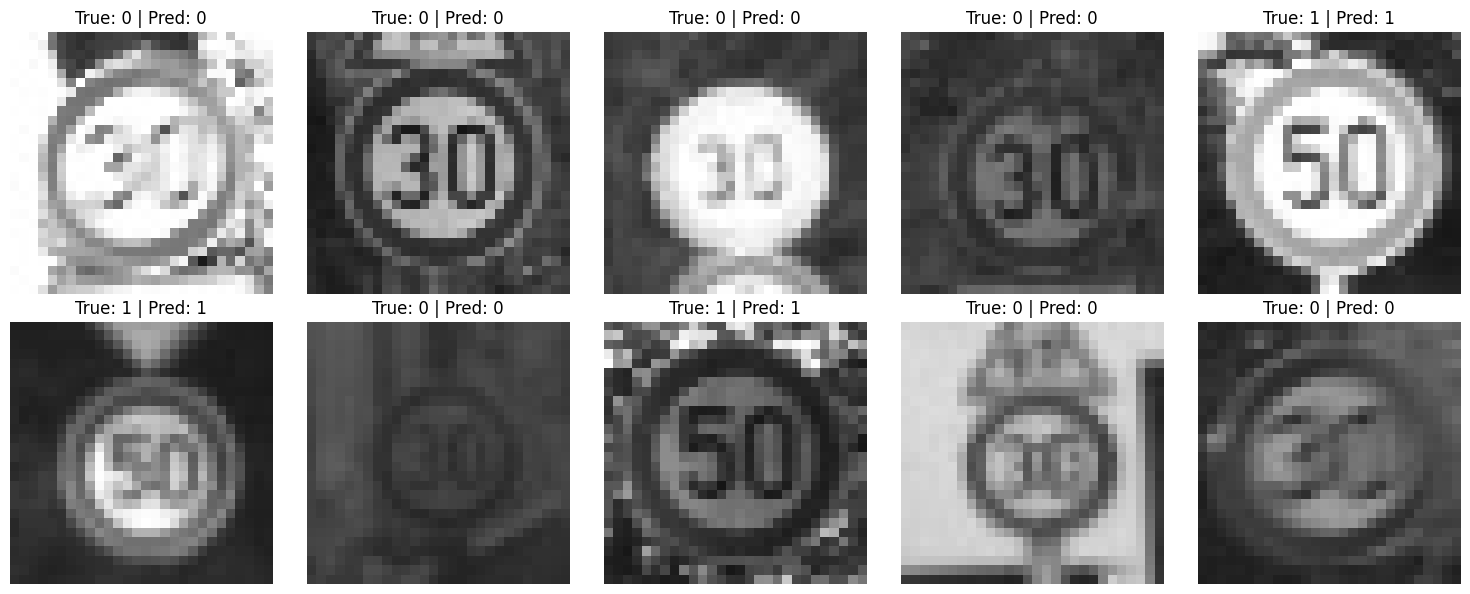

In [10]:
predictions = model_baseline.predict(pixels).squeeze()

pred_labels = (predictions > 0.5).astype(int)

correct = np.sum(pred_labels == labels)
accuracy_baseline = correct / len(labels)

print(f'Baseline accuracy (one neuron, linear): {accuracy_baseline:.4f}')

plt.figure(figsize=(15, 6))
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'True: {labels[idx]} | Pred: {pred_labels[idx]}')
    plt.axis(False)

plt.tight_layout()
plt.show()

### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

In [11]:
inputs = Input(shape=(pixels.shape[1],))
x = Dense(128, activation="relu")(inputs)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)

model_advanced = Model(inputs, outputs)
model_advanced.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,849 (433.00 KB)

 Trainable params: 110,849 (433.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6070 - loss: 0.6562
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8001 - loss: 0.4608
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8852 - loss: 0.3279
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9118 - loss: 0.2534
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9242 - loss: 0.2065
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9285 - loss: 0.1976
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9434 - loss: 0.1747
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9374 - loss: 0.1844
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9337 - loss: 0.1765
Epoch 10/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9308 - loss: 0.1769
Epoch 11/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9598 - loss: 0.1172
Epoch 12/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

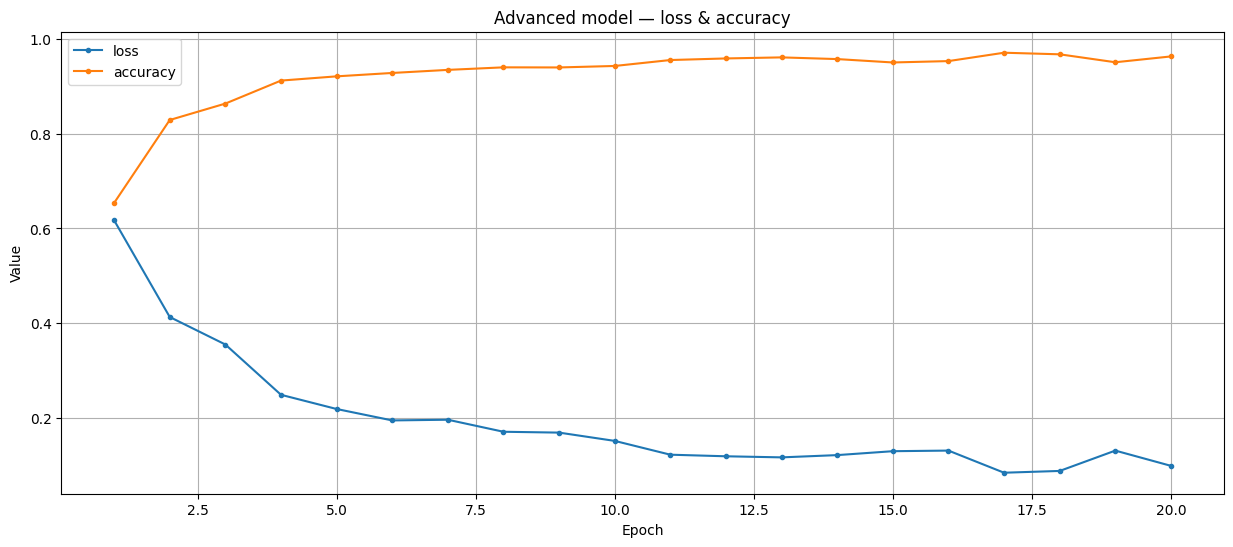

In [12]:
model_advanced.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_advanced = model_advanced.fit(
    pixels, labels,
    epochs=20,
    batch_size=32,
    verbose=1
)

h2 = history_advanced.history
epochs = range(1, len(h2['loss']) + 1)

plt.figure()
plt.plot(epochs, h2['loss'], '.-', label='loss')
plt.plot(epochs, h2['accuracy'], '.-', label='accuracy')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Advanced model — loss & accuracy')
plt.legend()
plt.show()

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Advanced model accuracy (MLP): 0.9756


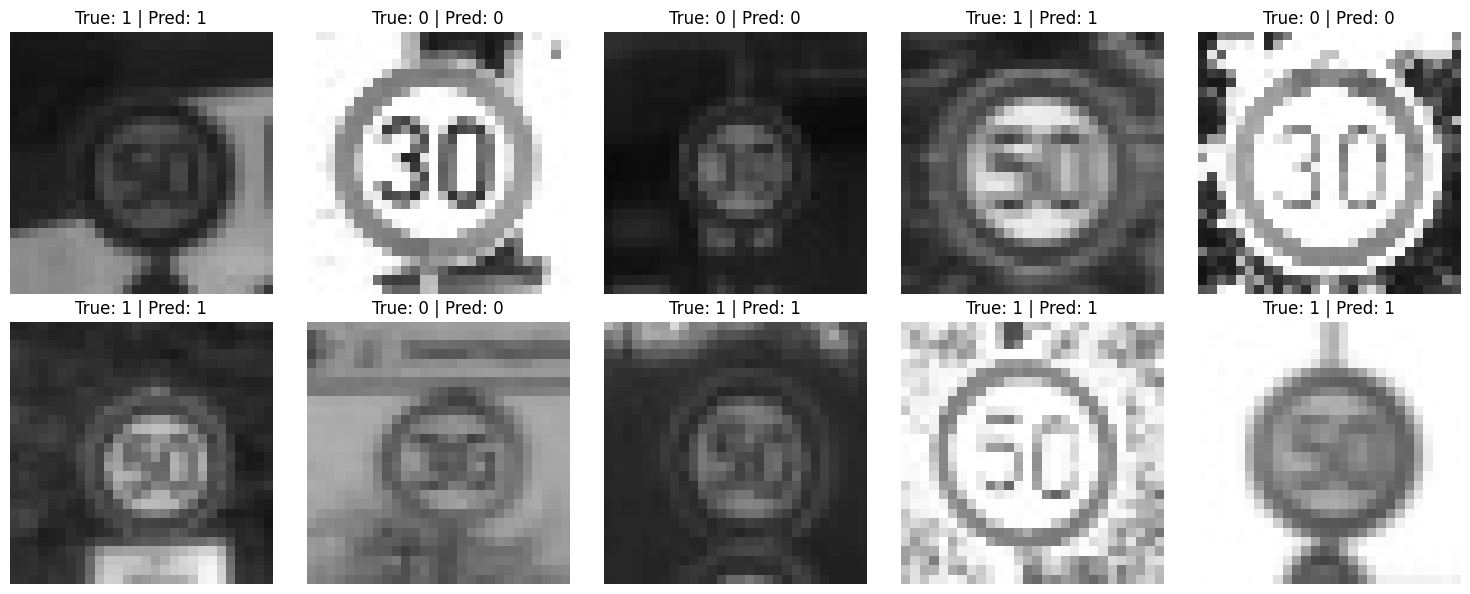

In [13]:
pred_probs = model_advanced.predict(pixels).squeeze()
pred_labels_adv = (pred_probs > 0.5).astype(int)

correct_adv = np.sum(pred_labels_adv == labels)
accuracy_advanced = correct_adv / len(labels)

print(f'Advanced model accuracy (MLP): {accuracy_advanced:.4f}')

plt.figure(figsize=(15, 6))
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'True: {labels[idx]} | Pred: {pred_labels_adv[idx]}')
    plt.axis(False)

plt.tight_layout()
plt.show()

# Prac 07.2

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [25]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

In [16]:
!apt-get install -y unrar
!pip install rarfile

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [17]:
import rarfile

rf = rarfile.RarFile('archive.rar')
rf.extractall()

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

In [21]:
root = 'archive'

data = pd.read_csv(os.path.join(root, 'Train.csv'))

num_samples = len(data)

print('Number of training samples:', num_samples)
print('Data columns:', data.columns.tolist())
data.head()

Number of training samples: 39209
Data columns: ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId', 'Path']


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


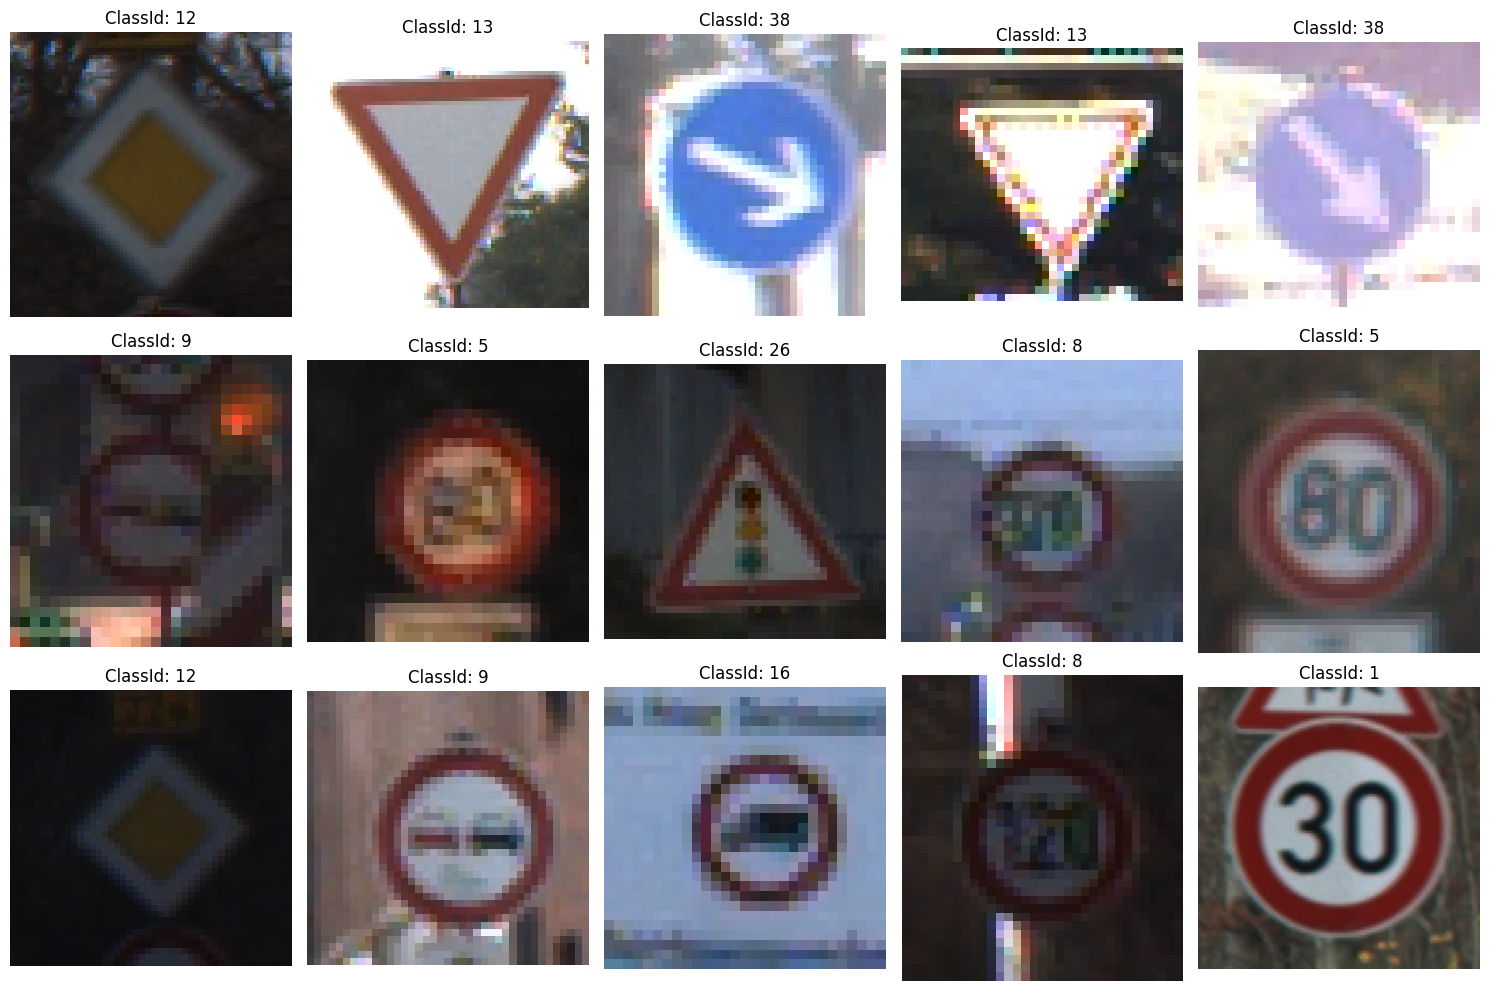

In [23]:
plt.figure(figsize=(15, 10))

for ii in range(15):
    idx = np.random.randint(0, num_samples)
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img_bgr = cv2.imread(img_path)
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 5, ii + 1)
    plt.imshow(img)
    plt.title(f"ClassId: {data.iloc[idx]['ClassId']}")
    plt.axis(False)

plt.tight_layout()
plt.show()

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [28]:
# Extract class identifiers
# Hint: Check the csv
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

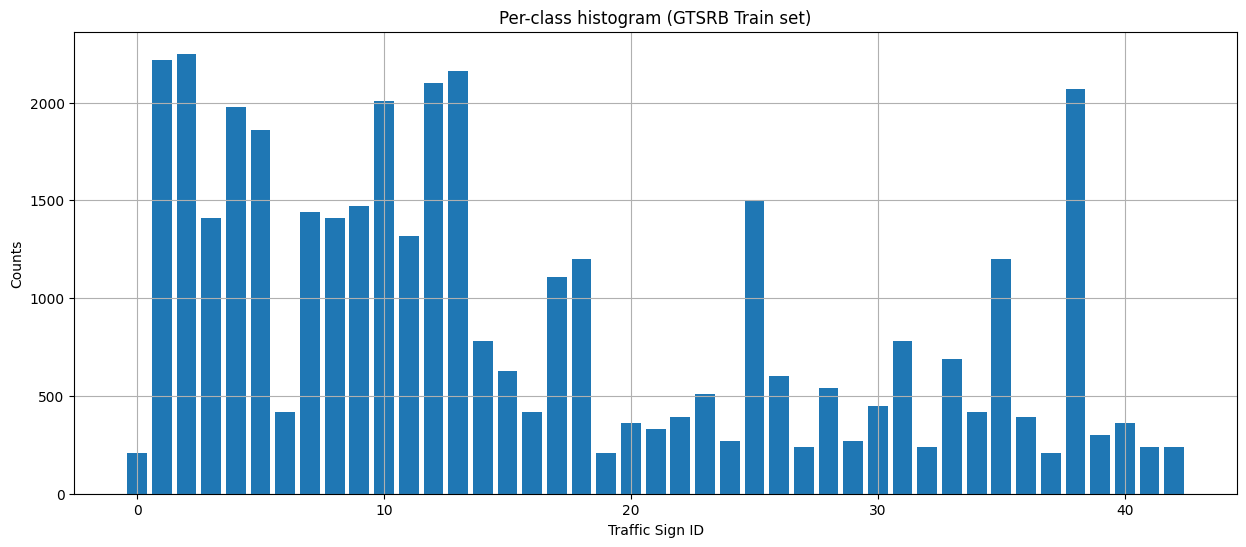

In [29]:
from collections import Counter
hist = Counter(ids)

plt.figure(figsize=(15, 6))
plt.bar(hist.keys(), hist.values())
plt.grid(True)
plt.xlabel('Traffic Sign ID')
plt.ylabel('Counts')
plt.title('Per-class histogram (GTSRB Train set)')
plt.show()

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

In [30]:
heights = []
widths = []

for idx in range(num_samples):
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img = cv2.imread(img_path)

    if img is None:
        continue

    h, w = img.shape[:2]
    heights.append(h)
    widths.append(w)

heights = np.array(heights)
widths = np.array(widths)

print('Num loaded images:', len(heights))
print('Height:  min =', heights.min(), ' max =', heights.max())
print('Width:   min =', widths.min(),  ' max =', widths.max())

Num loaded images: 39209
Height:  min = 25  max = 225
Width:   min = 25  max = 243


In [33]:
resolutions = list(zip(widths, heights))
res_counter = Counter(resolutions)

print('Top-10 most common resolutions (width, height, count):')
for (w, h), c in res_counter.most_common(10):
    print(f'{w} x {h}  -> {c} images')

areas = widths * heights

Top-10 most common resolutions (width, height, count):
31 x 31  -> 396 images
30 x 30  -> 380 images
35 x 35  -> 360 images
32 x 32  -> 352 images
33 x 33  -> 351 images
38 x 38  -> 345 images
34 x 34  -> 339 images
29 x 29  -> 338 images
30 x 31  -> 337 images
36 x 36  -> 334 images


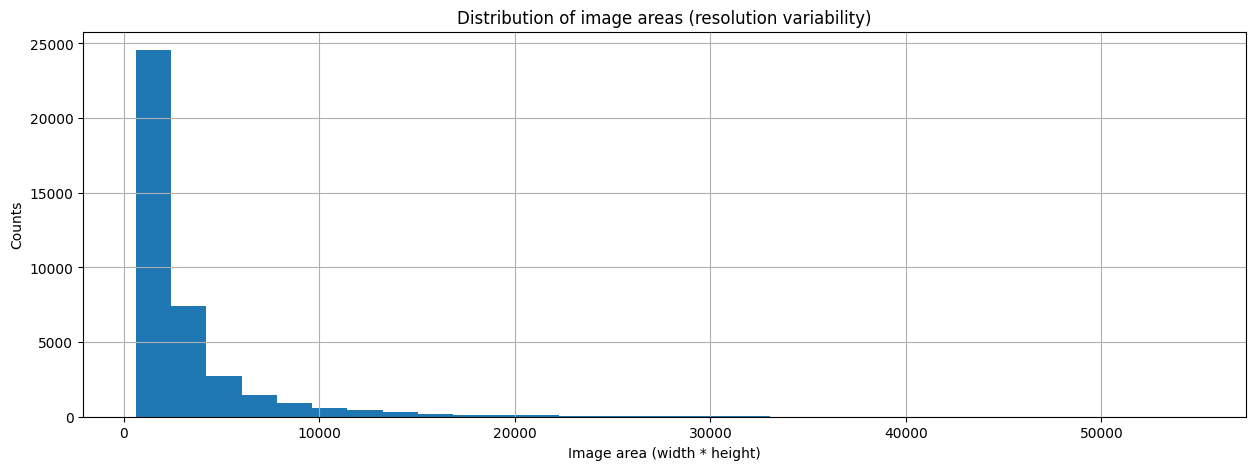

In [34]:
plt.figure(figsize=(15, 5))
plt.hist(areas, bins=30)
plt.grid(True)
plt.xlabel('Image area (width * height)')
plt.ylabel('Counts')
plt.title('Distribution of image areas (resolution variability)')
plt.show()

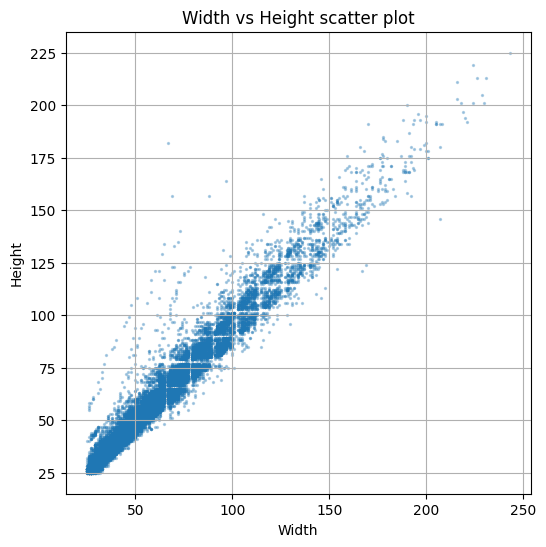

In [35]:
plt.figure(figsize=(6, 6))
plt.scatter(widths, heights, s=2, alpha=0.3)
plt.grid(True)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Width vs Height scatter plot')
plt.show()

In [37]:
brightness = []

for idx in range(num_samples):
    img_path = os.path.join(root, data.iloc[idx]['Path'])
    img_bgr = cv2.imread(img_path)

    if img_bgr is None:
        brightness.append(np.nan)
        continue

    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    brightness.append(gray.mean())

brightness = np.array(brightness)
print('Brightness stats (0–255 scale):')
print('  min =', np.nanmin(brightness))
print('  max =', np.nanmax(brightness))
print('  mean =', np.nanmean(brightness))

Brightness stats (0–255 scale):
  min = 6.202022777494475
  max = 248.44000933706815
  mean = 82.00611453570313


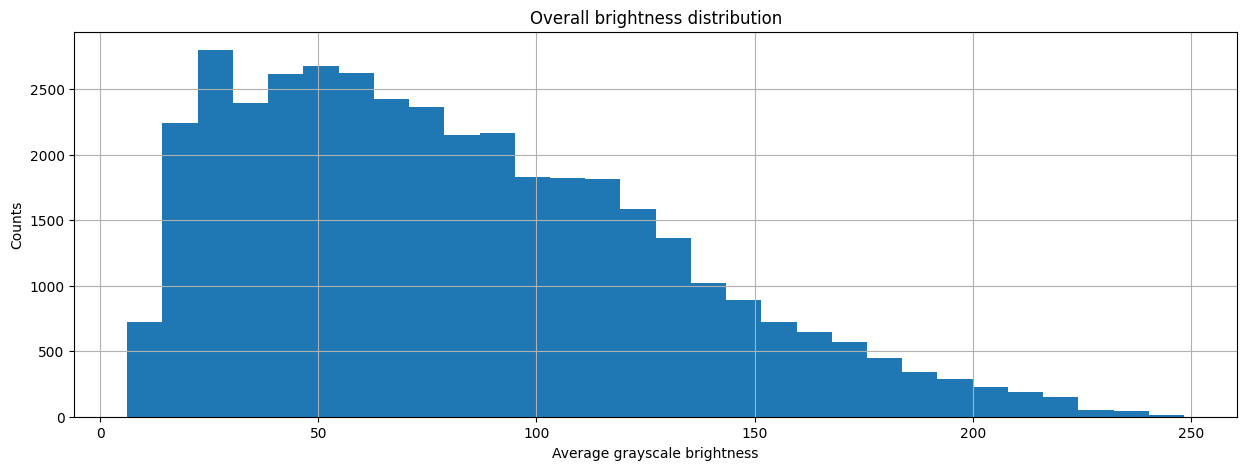

In [42]:
brightness_list = []
for b in brightness:
    if not np.isnan(b):
        brightness_list.append(b)

brightness_clean = np.array(brightness_list)

plt.figure(figsize=(15, 5))
plt.hist(brightness_clean, bins=30)
plt.grid(True)
plt.xlabel('Average grayscale brightness')
plt.ylabel('Counts')
plt.title('Overall brightness distribution')
plt.show()

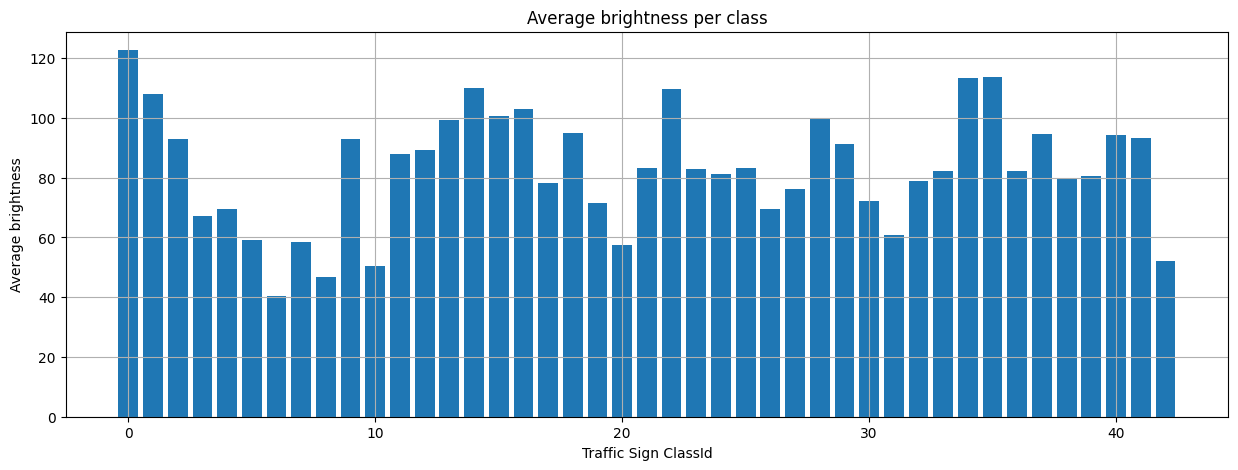

In [40]:
data['Brightness'] = brightness
class_brightness = data.groupby('ClassId')['Brightness'].mean()

plt.figure(figsize=(15, 5))
plt.bar(class_brightness.index, class_brightness.values)
plt.grid(True)
plt.xlabel('Traffic Sign ClassId')
plt.ylabel('Average brightness')
plt.title('Average brightness per class')
plt.show()

In [41]:
print('5 darkest classes (lowest avg brightness):')
print(class_brightness.sort_values().head())

print('\n5 brightest classes (highest avg brightness):')
print(class_brightness.sort_values().tail())

5 darkest classes (lowest avg brightness):
ClassId
6     40.250423
8     46.908378
10    50.392712
42    52.030146
20    57.361867
Name: Brightness, dtype: float64

5 brightest classes (highest avg brightness):
ClassId
22    109.747361
14    110.130700
34    113.344344
35    113.527621
0     122.700563
Name: Brightness, dtype: float64
